# Predicting Housing Prices using Regression Model

## 1. Problem Statement

> How do different factors affect the prices of housing?

## 2. Data

The data set is obtained from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data, which is the Ames Housing dataset compiled by Dean de Cock. It consists of 3 files:

* train.csv - the training set
* test.csv - the test set
*
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column name used here
*
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## 3. Evaluation metric

The result will be evaluated by the **root mean squared error (RMSE)** between the log of the predicted value and the log of the observed sales price.

The logs are taken to ensure errors in predicting expensive and cheap houses will affect the result equally.

## 4. Features of data

The features of the data can be found in this data description file: https://docs.google.com/spreadsheets/d/1uhm4nP2iyUoEKdQ72Kd7DNway4Ne1_ZrEPc4aRoxXZo/edit?usp=sharing.

### Exploratory Data Analysis

In [1]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import data
import io #to allow reading of uploaded file
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/house_prices_prediction_project/data/train.csv', low_memory=False)

#Configure setting to see whole dataframe when needed
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [10]:
#Check columns and their datatypes in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Upon examining the dataset, it is observed that there are 2 columns, MoSold and YrSold, which indicates this dataset to be a time series. Hence, I'll sort the data in chronological order

In [11]:
len(df)

1460

In [12]:
#Sort data in chronological order
df.sort_values(["YrSold","MoSold","Id"], ascending=True, inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,142,20,RL,78.0,11645,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1300,Unf,0,434,1734,GasA,Ex,Y,SBrkr,1734,0,0,1734,1,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2005.0,Fin,2,660,TA,TA,Y,160,24,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,260000
1,170,20,RL,NaN,16669,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1981,1981,Hip,WdShake,Plywood,Plywood,BrkFace,653.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1686,1686,GasA,TA,Y,SBrkr,1707,0,0,1707,0,0,2,1,2,1,TA,6,Typ,1,TA,Attchd,1981.0,RFn,2,511,TA,TA,Y,574,64,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,228000
2,303,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,150.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1541,1541,GasA,Ex,Y,SBrkr,1541,0,0,1541,0,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,3,843,TA,TA,Y,468,81,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,205000
3,371,60,RL,NaN,8121,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,711,0,1664,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2000.0,RFn,2,460,TA,TA,Y,100,40,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,172400
4,412,190,RL,100.0,34650,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Gilbert,Norm,Norm,2fmCon,1Story,5,5,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,Rec,1056,Unf,0,0,1056,GasA,TA,N,SBrkr,1056,0,0,1056,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1955.0,Fin,2,572,TA,TA,Y,264,0,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,145000


In [13]:
#Check which columns are missing
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


From this output, we can see that the target variable of interest, SalePrice, has no missing values but some feature variables (containing numeric and object datatype) has missing values, which we have to process before fitting the model.

[Text(0.5, 0, 'Overall Condition of house'),
 Text(0, 0.5, 'Sale Price'),
 Text(0.5, 1.0, 'Sale Price vs Overall Condition')]

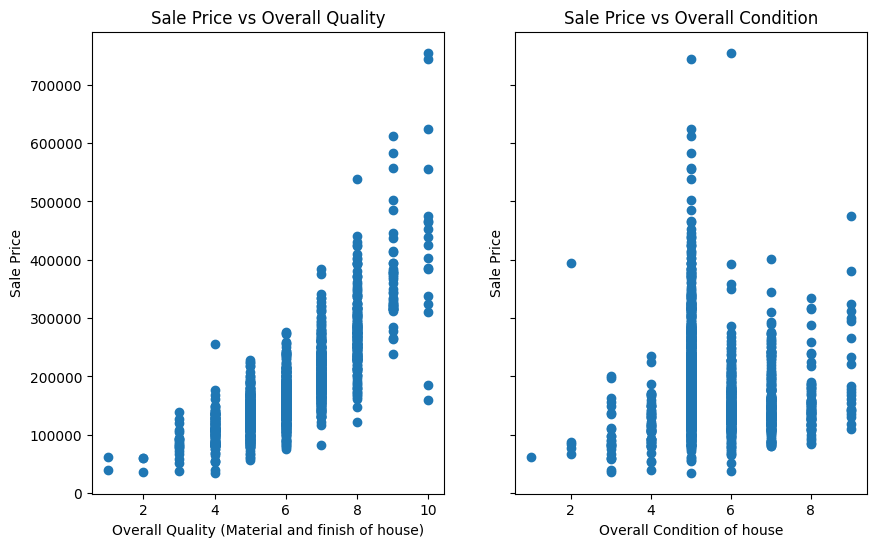

In [14]:
#Visualise the relationship between SalePrice and OverallQual
fig, (ax1,ax2) = plt.subplots(figsize=(10,6), nrows=1, ncols=2, sharey=True)
ax1.scatter(df.OverallQual, df.SalePrice)
ax1.set(ylabel="Sale Price",xlabel="Overall Quality (Material and finish of house)",title="Sale Price vs Overall Quality")
#Visualise the relationship between SalePrice and OverallCond
ax2.scatter(df.OverallCond, df.SalePrice)
ax2.set(xlabel="Overall Condition of house",
       ylabel="Sale Price",
       title="Sale Price vs Overall Condition")


The following observations were made:
* Outliers can be observed for both overall quality and condition where there are extreme points of sale prices in both plots.
* It is observed that the overall quality (overall material and finish of the house) is associated with a higher sale price, indicative of a positive association between the 2 variables.
* A gentler general positive trend can be observed between overall condition and sale price, though it seems that the higher sale prices (with more data points) tend to be when the condition of the house is average(at 5). One reason could be due to more buyers wanting to purchase the house for an overhaul and do not need a house in pristine condition house for that and since there is more demand in house at that condition, the prices tend to be higher due to the limited supply compared to higher market demand.

[Text(0.5, 0, 'Year house was sold'),
 Text(0, 0.5, 'Sale Price'),
 Text(0.5, 1.0, 'Trend of Sale Prices over the years')]

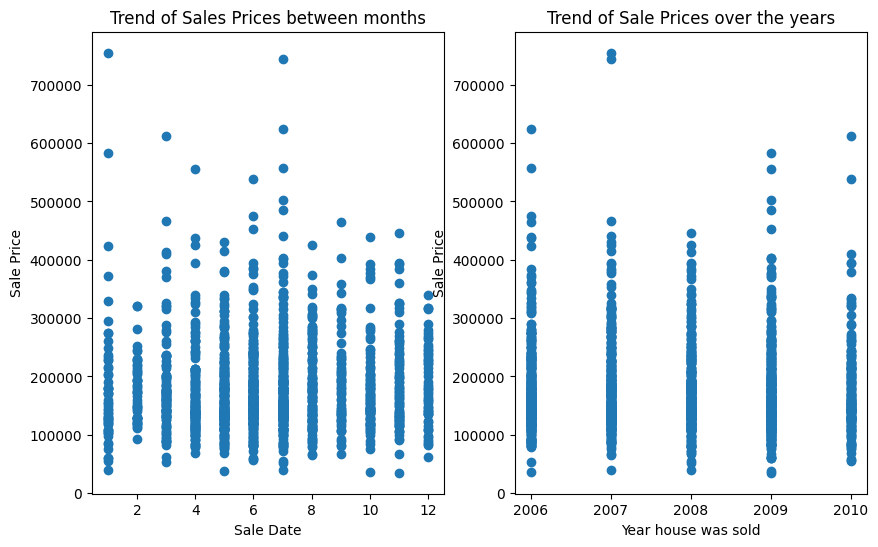

In [15]:
#Visualise Sale Price over the year and over time
fig, (ax3, ax4) = plt.subplots(figsize=(10,6), ncols=2)
ax3.scatter(df.MoSold, df.SalePrice)
ax3.set(xlabel="Sale Date",
       ylabel="Sale Price",
       title="Trend of Sales Prices between months")

ax4.scatter(df.YrSold,df.SalePrice)
ax4.set(xlabel= "Year house was sold",
       ylabel="Sale Price",
       title="Trend of Sale Prices over the years")

It can be observed that the sale prices have not varied much over the years in the dataset, as indicated by the "Trend of Sale Prices over the years" plot.

In [16]:
#Creating a copy of df
df_tmp = df.copy()

## 5. Building a regression model

Since this is a regression model where we are trying to predict the sale prices of houses, the RandomForestRegressor will be used to predict as the dataset given is structured (labelled).

The details of the model can be found in the link below:

* RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [17]:
#Import model and tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Split data into X and y
X = df_tmp.drop("SalePrice", axis=1)
y = df_tmp["SalePrice"]

#Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1168, 80), (292, 80), (1168,), (292,))

We can see that the split is successful with the training data having 1168 rows and the test set has 292 rows.

In [19]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,698,20,RL,57.0,6420,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,Ex,Gd,Mn,LwQ,210,ALQ,551,219,980,GasA,Fa,Y,FuseA,1148,0,0,1148,0,1,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal
1066,406,20,RL,NaN,9991,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,4,4,1976,1993,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,1116,Unf,0,165,1281,GasA,Ex,Y,SBrkr,1620,0,0,1620,1,0,2,0,3,1,TA,8,Min1,1,TA,Attchd,1993.0,Unf,2,490,TA,TA,Y,120,78,0,0,0,0,NaN,GdWo,NaN,0,6,2009,WD,Normal
638,743,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2000,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,108.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1349,1349,GasA,Ex,Y,SBrkr,1349,0,0,1349,0,0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,2000.0,Unf,2,539,TA,TA,Y,120,55,0,0,0,0,NaN,GdPrv,NaN,0,12,2007,WD,Normal
799,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,NaN,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal
380,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal


### Data Processing

This step is done after splitting, for X_train and X_valid, to prevent overfitting of the model.

**Filling in missing values for all columns and convert categorical values into numeric values**

In [20]:
#Create function to fill in missing values and convert categories to numeric values
def process_data(df):
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Fill in missing values for numeric columns
                df[label] = content.fillna(content.median())

        #Convert all non-numeric rows into categorical codes
        if not pd.api.types.is_numeric_dtype(content):
            #Add 1 to missing values to get rid of -1 value
            df[label] = pd.Categorical(content).codes + 1

    return df

In [21]:
#Process datasets
X_train = process_data(X_train)
X_valid = process_data(X_valid)

In [22]:
#Check if dataset is processed correctly
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,698,20,4,57.0,6420,2,0,1,4,1,5,1,8,3,3,1,3,5,7,1952,1952,2,2,14,15,0,0.0,4,5,3,1,2,3,4,210,1,551,219,980,1,2,2,1,1148,0,0,1148,0,1,1,0,2,1,4,6,7,0,0,6,1952.0,3,1,308,5,5,3,0,0,0,0,0,0,0,0,0,0,9,2006,9,5
1066,406,20,4,69.0,9991,2,0,1,4,1,1,1,20,2,3,1,3,4,4,1976,1993,2,2,10,11,0,0.0,4,5,2,4,4,4,2,1116,6,0,165,1281,1,1,2,5,1620,0,0,1620,1,0,2,0,3,1,4,8,3,1,5,2,1993.0,3,2,490,5,5,3,120,78,0,0,0,0,0,2,0,0,6,2009,9,5
638,743,20,4,65.0,8450,2,0,4,4,1,5,1,21,3,3,1,3,7,5,2000,2001,2,2,13,14,2,108.0,4,5,3,3,4,4,6,0,6,0,1349,1349,1,1,2,5,1349,0,0,1349,0,0,2,0,3,1,4,6,7,0,0,2,2000.0,3,2,539,5,5,3,120,55,0,0,0,0,0,1,0,0,12,2007,9,5
799,31,70,1,50.0,8500,2,2,4,4,1,5,1,10,2,3,1,6,4,4,1920,1950,3,2,4,4,0,0.0,4,2,1,4,4,4,6,0,6,0,649,649,1,5,1,5,649,668,0,1317,0,0,1,0,3,1,4,6,7,0,0,6,1920.0,3,1,250,5,2,1,0,54,172,0,0,0,0,3,0,0,7,2008,9,5
380,1430,20,4,69.0,12546,2,0,1,4,1,1,1,15,3,3,1,3,6,7,1981,1981,2,2,9,9,2,310.0,3,3,2,3,4,4,2,678,6,0,762,1440,1,1,2,5,1440,0,0,1440,0,0,2,0,3,1,3,7,7,1,5,2,1981.0,1,2,467,5,5,3,0,0,99,0,0,0,0,0,0,0,4,2007,9,5


In [23]:
#Instantiate model
model = RandomForestRegressor(n_jobs=-1, #allow full resource used
                             random_state=42) #ensure reproducibllity of results

#Create root mean squared error function
def rmse(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    return rmse

#Create function to fit and score model
def fit_score_model(model, X_train, y_train, X_test, y_test):
    '''
    Fit and score model using RMSE on logs of predicted values and observed house prices
    '''
    model.fit(X_train,y_train)
    y_train_preds = model.predict(X_train)
    y_valid_preds = model.predict(X_test)
    log_y_train = np.log(y_train)
    log_y_valid = np.log(y_test)
    log_y_train_preds = np.log(y_train_preds)
    log_y_valid_preds = np.log(y_valid_preds)
    #scores done on logs of true and predicted values as required for evaluating the problem
    scores = {"Training RMSE": rmse(log_y_train, log_y_train_preds),
              "Validation RMSE": rmse(log_y_valid, log_y_valid_preds)}
    return scores

In [24]:
original_score = fit_score_model(model, X_train, y_train, X_valid, y_valid)
print(original_score)

{'Training RMSE': 0.059545641359804995, 'Validation RMSE': 0.15498095083360544}


The training and validation RMSE scores will be used as comparison to assess the effectiveness of hyperparameter tuning. Now we will tune the hyperparameters to try to lower RMSE. The score is saved under the `original_score` variable for easy reference for comparison after hyper parameter tuning.

## 6. Hyperparameter tuning

Hyperparameter tuning will be conducted using RandomizedSearchCV as the dataset is not a small dataset (>1000 rows).

In [25]:
len(X_train)

1168

In [26]:
from sklearn.model_selection import RandomizedSearchCV

# Create parameter grid for RandomizedSearchCV
rs_grid = {"n_estimators": np.arange(5,100,100),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features" : [None, "log2", "sqrt"]}

#Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                             param_distributions=rs_grid,
                             n_iter=1000,
                             cv=5,
                             verbose=True,
                             error_score="raise")
#Fit the RandomizedSearchCV model
rs_score = fit_score_model(rs_model, X_train, y_train, X_valid, y_valid)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [27]:
original_score, rs_score

({'Training RMSE': 0.059545641359804995,
  'Validation RMSE': 0.15498095083360544},
 {'Training RMSE': 0.11533414941391376,
  'Validation RMSE': 0.17572924793088504})

We can observe an increase in both the training and validation RMSE for rs_model, which is indicative that the tuning of hyperparameters has not been effective in improving the model's performance. Hence, the predictions of the sales prices will be done using the untuned model and the test dataset.

## 7. Making predictions using test data

In [28]:
#Import test data
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/house_prices_prediction_project/data/test.csv', index_col=False)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [29]:
df_test.shape

(1459, 80)

In [30]:
#Check for missing values
df_test.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
Street,0
Alley,1352
LotShape,0
LandContour,0
Utilities,2


The presence of missing values indicates it needs to be processed.

In [31]:
#Sort dataset by date chronologically
df_test.sort_values(["YrSold", "MoSold","Id"], ascending= True, inplace=True)
df_test.reset_index(inplace=True, drop=True)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2623,60,RL,50.0,13128,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,216.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1074.0,1074.0,GasA,Ex,Y,SBrkr,1074,990,0,2064,0.0,0.0,2,1,4,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2.0,527.0,TA,TA,Y,0,119,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal
1,2632,60,RL,92.0,15922,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,550.0,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1390.0,1390.0,GasA,Ex,Y,SBrkr,1390,1405,0,2795,0.0,0.0,3,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2005.0,Fin,3.0,660.0,TA,TA,Y,272,102,0,0,0,0,NaN,NaN,NaN,0,1,2006,New,Partial
2,2686,60,RL,75.0,12447,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,RRAn,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,Stone,192.0,Gd,TA,PConc,Gd,Gd,No,Unf,0.0,Unf,0.0,1100.0,1100.0,GasA,Ex,Y,SBrkr,1116,848,0,1964,0.0,0.0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2005.0,Fin,2.0,760.0,TA,TA,Y,200,70,0,0,0,0,NaN,NaN,NaN,0,1,2006,New,Partial
3,2692,20,RL,74.0,7733,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,TA,TA,Mn,GLQ,24.0,Unf,0.0,1118.0,1142.0,GasA,Ex,Y,SBrkr,1142,0,0,1142,0.0,0.0,1,1,3,1,Gd,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,4,50,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal
4,2708,20,RL,NaN,13052,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,712.0,Unf,0.0,312.0,1024.0,GasA,TA,Y,SBrkr,1024,0,0,1024,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1965.0,Unf,1.0,308.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,1,2006,WD,Normal


In [32]:
#Process test data using process_data function
df_features = process_data(df_test)

In [33]:
#Check if df_features is processed correctly
df_features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2623,60,4,50.0,13128,2,0,1,2,1,2,1,9,3,3,1,5,8,5,2005,2005,2,1,11,13,2,216.0,3,5,3,3,4,4,6,0.0,6,0.0,1074.0,1074.0,1,1,2,4,1074,990,0,2064,0.0,0.0,2,1,4,1,3,7,7,1,3,2,2005.0,1,2.0,527.0,4,5,3,0,119,0,0,0,0,0,0,0,0,1,2006,9,5
1,2632,60,4,92.0,15922,2,0,1,2,1,1,1,23,3,3,1,5,9,5,2005,2006,4,1,11,13,2,550.0,3,5,3,1,4,1,6,0.0,6,0.0,1390.0,1390.0,1,1,2,4,1390,1405,0,2795,0.0,0.0,3,1,4,1,1,10,7,1,3,4,2005.0,1,3.0,660.0,4,5,3,272,102,0,0,0,0,0,0,0,0,1,2006,7,6
2,2686,60,4,75.0,12447,2,0,1,4,1,5,1,22,7,3,1,5,8,5,2005,2006,2,1,6,6,3,192.0,3,5,3,3,2,4,6,0.0,6,0.0,1100.0,1100.0,1,1,2,4,1116,848,0,1964,0.0,0.0,2,1,3,1,3,8,7,1,3,4,2005.0,1,2.0,760.0,4,5,3,200,70,0,0,0,0,0,0,0,0,1,2006,7,6
3,2692,20,4,74.0,7733,2,0,1,4,1,5,1,21,3,3,1,3,6,5,2005,2005,2,1,11,13,0,0.0,4,5,3,4,4,3,3,24.0,6,0.0,1118.0,1142.0,1,1,2,4,1142,0,0,1142,0.0,0.0,1,1,3,1,3,5,7,0,0,0,1979.0,0,0.0,0.0,0,0,3,4,50,0,0,0,0,0,0,0,0,1,2006,9,5
4,2708,20,4,67.0,13052,2,0,1,4,1,2,1,20,3,3,1,3,5,6,1965,1965,2,1,7,7,0,0.0,4,5,2,4,4,4,5,712.0,6,0.0,312.0,1024.0,1,5,2,4,1024,0,0,1024,0.0,0.0,1,1,3,1,4,5,7,0,0,2,1965.0,3,1.0,308.0,4,5,3,0,0,0,0,0,0,0,3,0,0,1,2006,9,5


In [34]:
#Check if missing values are filled in
df_features.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,0
LotShape,0
LandContour,0
Utilities,0


The test dataframe is processed, with no missing values present.

In [35]:
#Check if columns of test dataset matches training set
df_features.shape, X_train.shape

((1459, 80), (1168, 80))

The number of columns between the training and test datasets match. Hence, the model can be fitted with the dataset to make predictions on the sale price.

**Creating predictions in format stated in Kaggle**

As stated in www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation.

In [38]:
test_preds = model.predict(df_features)

In [39]:
test_preds.shape

(1459,)

In [40]:
df_predictions = pd.DataFrame({"Id": df_features["Id"],
                              "SalePrice": test_preds})

df_predictions.sort_values("Id", inplace=True)
df_predictions.reset_index(drop=True, inplace=True)
df_predictions.head()

,Id,SalePrice
0,1461,121699.16
1,1462,160574.90
2,1463,175140.27
3,1464,180667.06
4,1465,209017.80


In [ ]:
#Export file as csv
export_preds = df_predictions.to_csv('/content/drive/My Drive/Colab Notebooks/house_prices_prediction_project/sales_price_predictions.csv', index=False)

## 8. Future work

**A. Feature importance**

Feature importance is crucial in determining the attributes (features) that are important in influencing the prediction of the target variable, which is the housing prices in this regression project. This can help us to get a better idea on how the housing prices are influenced and allow:
* Buyers to have a better estimate on the prices of the houses they are interested in buying, allowing them to purchase them at a reasonable price
* Sellers to increase the value of their houses by improving on the factors that influence the selling prices

In [48]:
#Store features importance of model in dictionary
df_feature_importances = (pd.DataFrame({"features": df_features.columns,
                                       "feature_importances": model.feature_importances_})
.sort_values("feature_importances", ascending=False)
.reset_index(drop=True))

#Check if dictionary is created successfully
df_feature_importances.head()

,features,feature_importances
0,OverallQual,0.601985
1,GrLivArea,0.117645
2,TotalBsmtSF,0.036544
3,BsmtFinSF1,0.024289
4,1stFlrSF,0.020121


[]

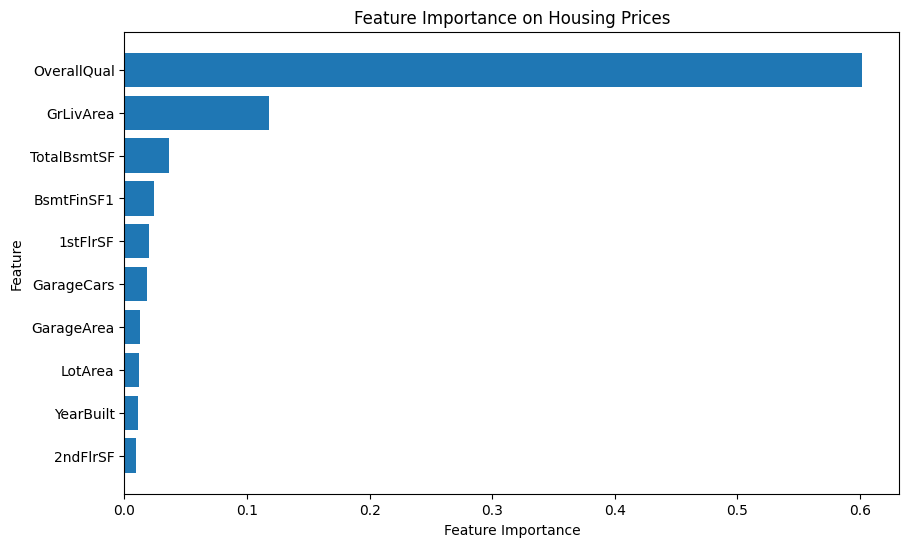

In [56]:
#Visualise the top 10 features
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(df_feature_importances.features[:10], df_feature_importances.feature_importances[:10])
ax.set(xlabel= "Feature Importance",
       ylabel= "Feature",
       title= "Feature Importance on Housing Prices")
ax.invert_yaxis()
plt.plot()

Based on the horizontal bar graph, the Overall Quality (material and finish of the house) is the most important factor that influences the housing price, followed by GrLivArea (Above grade (ground) living area square feet) and TotalBsmtSF (Total square feet of basement area).

**B. Use of gradient boosting models**

We can improve the RMSE by using other models e.g. gradient boosting libraries such as CatBoost and get more accurate predictions, with models that provide a lower Validation RMSE. CatBoost is able to handle categorical data (which is part of the dataset) without the use of one-hot encoding, by ordered encoding of these features. This results in reduced overfitting and more accurate model, which is marked with an improvement in RMSE, as shown below.

Reference: https://www.kaggle.com/code/faressayah/xgboost-vs-lightgbm-vs-catboost-vs-adaboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

#Instantiate CatBoostRegressor
cat_model = CatBoostRegressor(loss_function="RMSE")

#Fit the model and score
cat_score = fit_score_model(cat_model, X_train, y_train, X_valid, y_valid)

Learning rate set to 0.04196
0:	learn: 77467.5224446	total: 52.9ms	remaining: 52.9s
1:	learn: 75357.8484530	total: 57.8ms	remaining: 28.8s
2:	learn: 73399.2423792	total: 62.9ms	remaining: 20.9s
3:	learn: 71417.7453832	total: 67.6ms	remaining: 16.8s
4:	learn: 69613.1754731	total: 72.1ms	remaining: 14.4s
5:	learn: 67723.0931961	total: 76.9ms	remaining: 12.7s
6:	learn: 66032.2802451	total: 81.6ms	remaining: 11.6s
7:	learn: 64499.3356038	total: 86.5ms	remaining: 10.7s
8:	learn: 63032.9171247	total: 91.5ms	remaining: 10.1s
9:	learn: 61574.7806316	total: 96.3ms	remaining: 9.53s
10:	learn: 59979.9147348	total: 101ms	remaining: 9.09s
11:	learn: 58509.6788468	total: 106ms	remaining: 8.73s
12:	learn: 57225.5328053	total: 111ms	remaining: 8.41s
13:	learn: 55949.1080482	total: 115ms	remaining: 8.13s
14:	learn: 54763.1122504	total: 120ms	remaining: 7.91s
15:	learn: 53632.3933798	total: 125ms	remaining: 7.69s
16:	learn: 52546.7387411	total: 130ms	remaining: 7.51s
17:	learn: 51471.1651077	total: 135m

In [ ]:
original_score, cat_score

({'Training RMSE': 0.059545641359804995,
  'Validation RMSE': 0.15498095083360544},
 {'Training RMSE': 0.03623933227481867, 'Validation RMSE': 0.1293099409119453})

We can see an improvement in the RMSE (a lower RMSE observed for CatBoostRegressor), which suggests that CatBoostRegressor is more accurate in predicting the sales prices of housing.

In [ ]:
#Predict SalePrice using cat_model
cat_preds = cat_model.predict(df_features)

#Insert SalePrice predictions into df_prediction to export
df_predictions["SalePrice"] = cat_preds

df_predictions.head()

,Id,SalePrice
0,1461,239111.711328
1,1462,422132.239443
2,1463,247112.807185
3,1464,131096.864995
4,1465,127688.417565


In [ ]:
#Export predictions
df_predictions.to_csv('/content/drive/My Drive/Colab Notebooks/house_prices_prediction_project/cat_sales_price_prediction.csv',index=False)

In [57]:
#Unmount drive
drive.flush_and_unmount()